In [48]:
import sys
import os
import numpy as np
import pandas as pd
import sklearn

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
#mnist dataset


mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]


In [ ]:
X.shape
#70000 rows 784 columns

In [25]:
mnist.target.shape
#Labels of the data

(70000,)

In [34]:
#Standardizing the data
scaler=StandardScaler()

#Fit and transform
scaler.fit(X)
X_fit=scaler.transform(X)

X_fit.shape

(70000, 784)

In [37]:
#covariance matrix - A^T * A

covar=np.matmul(X_fit.T,X_fit)
covar.shape
#784 by 784

(784, 784)

In [41]:
#Get pca1 and pca2
val,vec = eigh(covar,eigvals=(782,783))
print(vec.shape)

#transpose this to get pca1 and pca2
vec=vec.T
print(vec.shape)

(784, 2)
(2, 784)


In [71]:
#projecting to the eigen vaector plane
proj=np.matmul(vec,X_fit.T)
proj.shape

(2, 70000)

In [72]:
#making a dataframe from pc1 and pc2
proj=np.vstack((proj,mnist.target)).T
df=pd.DataFrame(data=proj,columns=('1','2','target'))
df.head()

,1,2,target
0,-4.929711,-0.891720,5.0
1,-7.517560,8.813530,0.0
2,9.824461,2.204835,4.0
3,-4.029669,-6.534627,1.0
4,3.278848,-5.251618,9.0


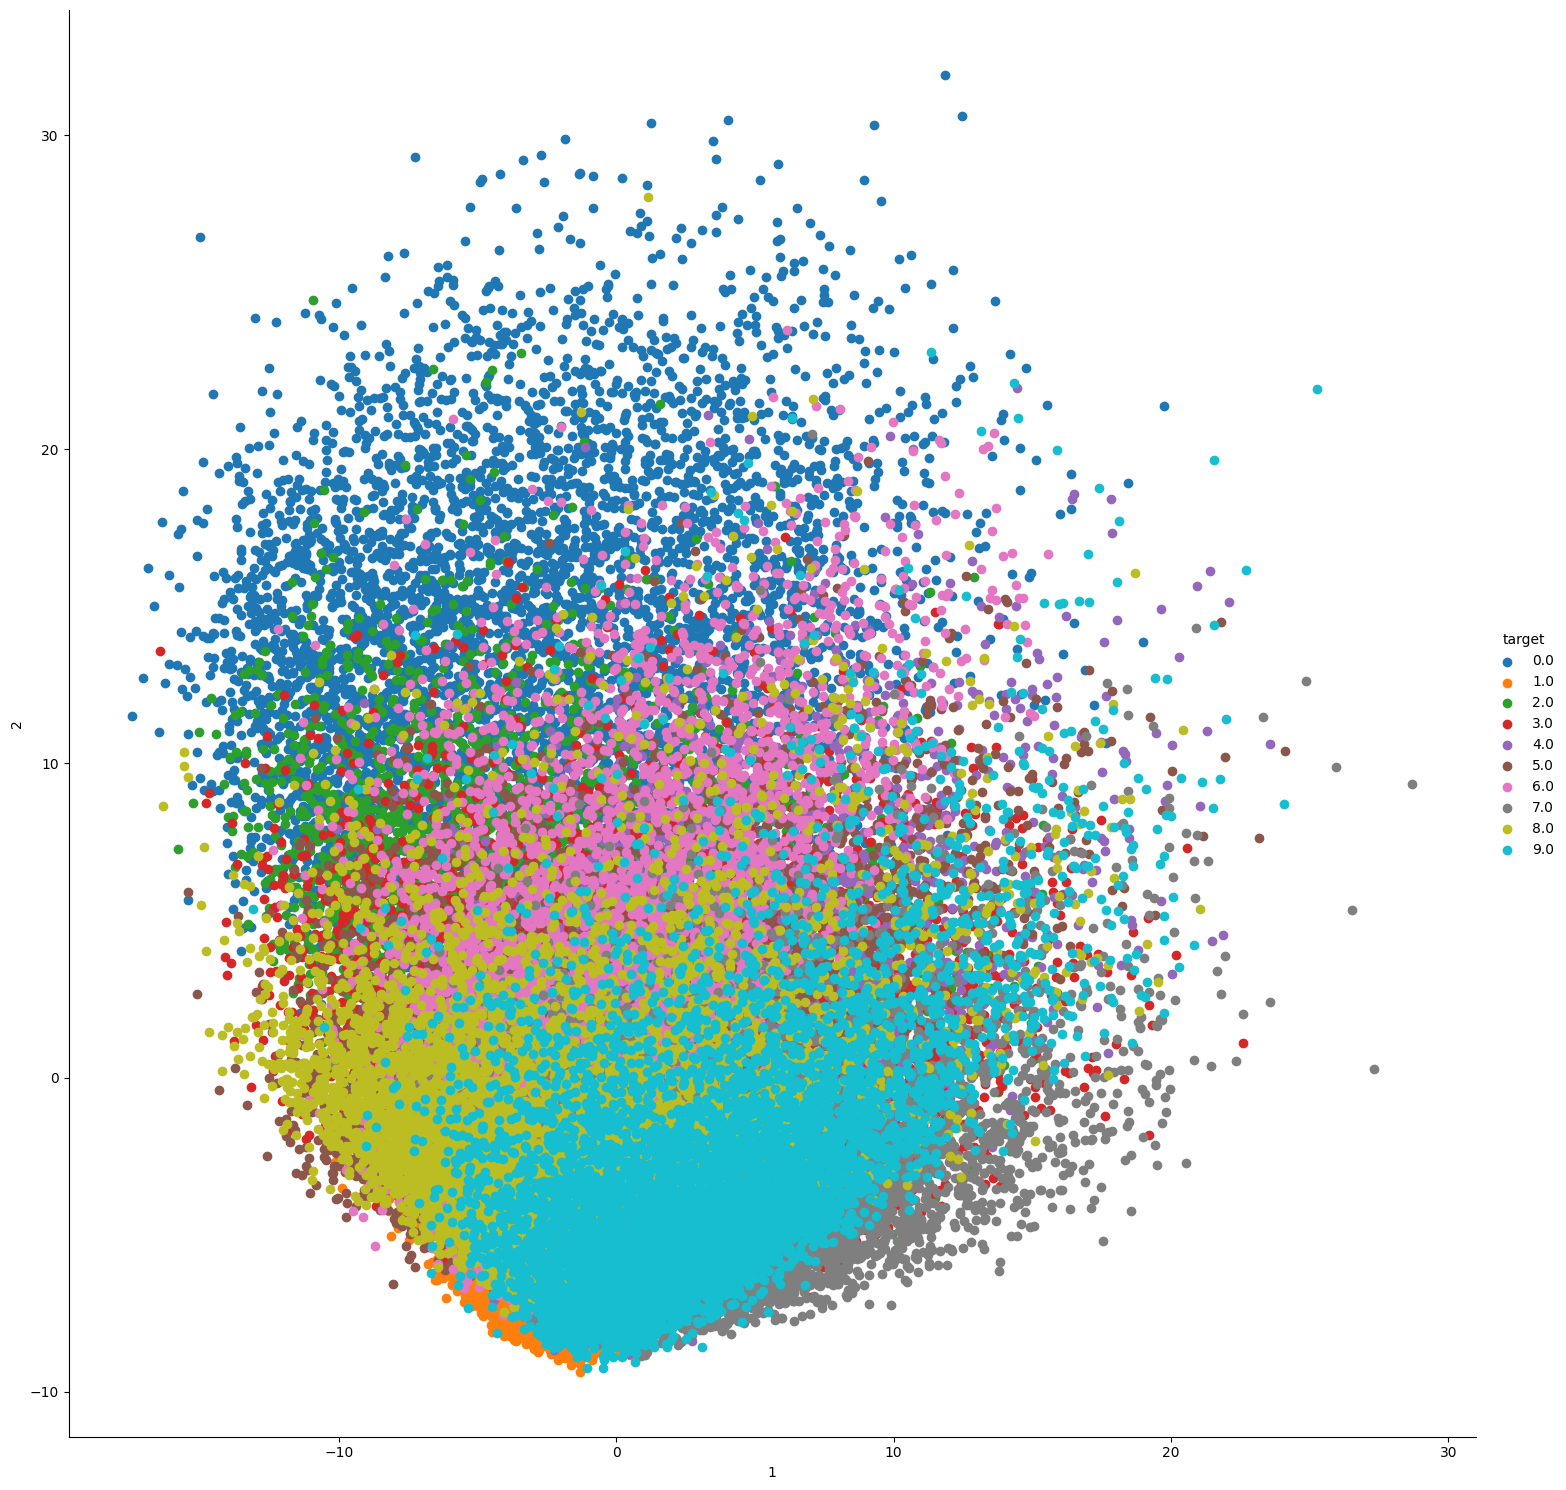

In [79]:
#First principal vs second pricipal
sns.FacetGrid(df, hue='target',height=15).map(plt.scatter, '1', '2').add_legend()
plt.show()

In [29]:
pca = PCA(n_components=2)
X_pca=pca.fit_transform(X_fit)

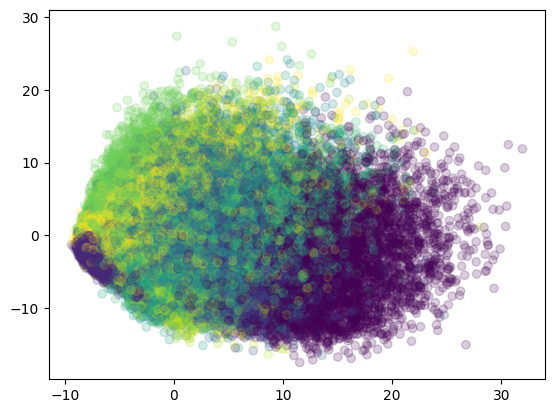

In [59]:
labels = mnist.target
labels = labels.astype('int')
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, alpha=0.2)

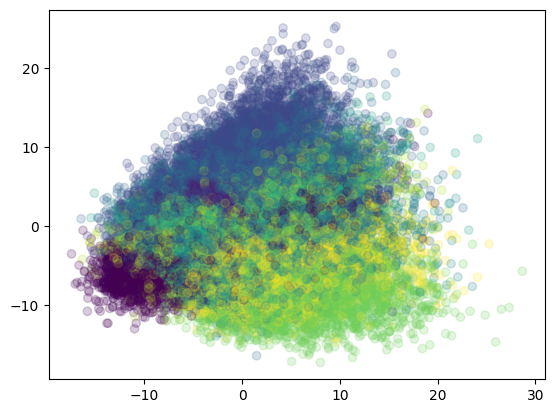

In [84]:
labels = mnist.target
labels = labels.astype('int')
plt.scatter(X_pca[:,1], X_pca[:,2], c=labels, alpha=0.2)

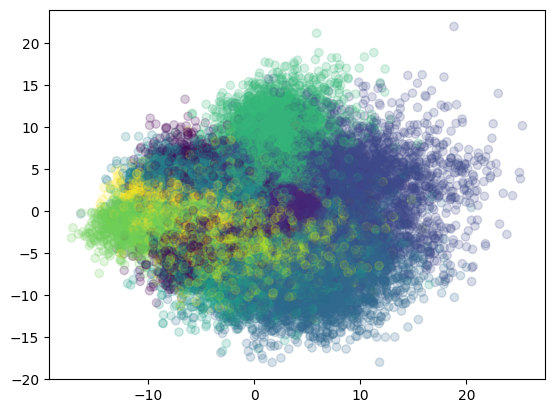

In [85]:
labels = mnist.target
labels = labels.astype('int')
plt.scatter(X_pca[:,2], X_pca[:,3], c=labels, alpha=0.2)

In [91]:
pca.n_components_

332

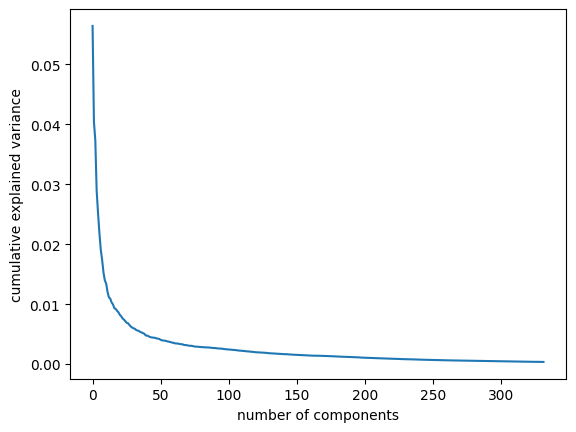

In [90]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
